<a href="https://colab.research.google.com/github/Praharshita1275/Machine-learning/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SUPPORT VECTOR MACHINES (SVM)
# Based on Cortes & Vapnik (1995)

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# STEP 1: Load Dataset
# import load_iris function from datasets module
from sklearn.datasets import load_iris
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
# print the iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target   # X = features (sepal/petal length & width), y = species labels

In [3]:
# STEP 2: Split Dataset

# Train-Test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [4]:
# STEP 3: Baseline SVM Model

# Create an SVM classifier with default parameters
baseline_svm = SVC()

# Train the baseline model
baseline_svm.fit(X_train, y_train)

# Make predictions on test data
y_pred_baseline = baseline_svm.predict(X_test)

# Evaluate baseline performance
print("Baseline SVM Results ")
print(classification_report(y_test, y_pred_baseline))
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))


Baseline SVM Results 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [5]:
# STEP 4: Hyperparameter Tuning with GridSearchCV

# Define a parameter grid to test different hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization strength
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf'], # Different kernel functions
    'degree': [2, 3, 4]                # Only used when kernel='poly'
}

# GridSearchCV will try all combinations of parameters
# cv=5 → 5-fold cross-validation for reliable evaluation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Train with hyperparameter search
grid_search.fit(X_train, y_train)

# Print best parameters found
print("\nBest Parameters from GridSearch:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...............C=0.1, degree=2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=2, gamma

In [6]:
# STEP 5: Evaluate Tuned Model

# Use the best model found by GridSearchCV
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tuned = best_svm.predict(X_test)

# Evaluate tuned model performance
print("\n Tuned SVM Results")
print(classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))


 Tuned SVM Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [7]:
# STEP 6: Compare Baseline vs Tuned Results

baseline_acc = accuracy_score(y_test, y_pred_baseline)
tuned_acc = accuracy_score(y_test, y_pred_tuned)

print("\nBaseline Accuracy:", baseline_acc)
print("Tuned Accuracy:", tuned_acc)


Baseline Accuracy: 1.0
Tuned Accuracy: 1.0


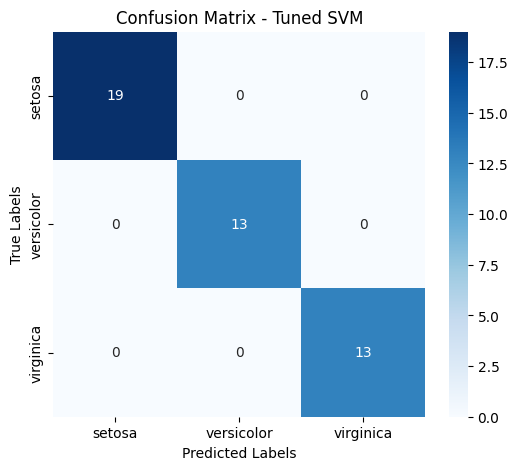

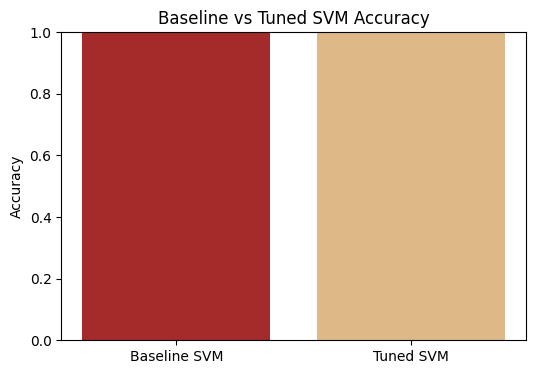

In [8]:
# STEP 7: Visualization
# Confusion Matrix for Tuned Model
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Bar chart comparing baseline vs tuned accuracy
plt.figure(figsize=(6,4))
plt.bar(["Baseline SVM", "Tuned SVM"], [baseline_acc, tuned_acc], color=["brown", "burlywood"])
plt.title("Baseline vs Tuned SVM Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


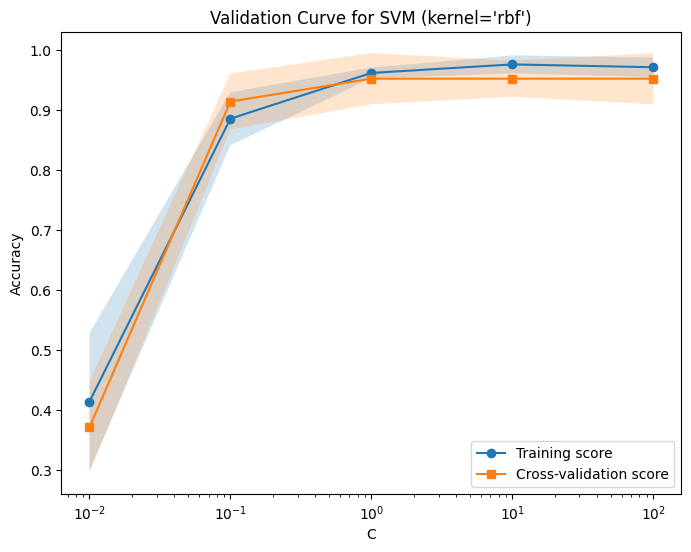

In [10]:
from sklearn.model_selection import validation_curve

param_name = 'C'
param_range = [0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma='scale'),
    X_train, y_train,
    param_name=param_name,
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# compute mean & std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation score", marker='s')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xscale('log')
plt.xlabel(param_name)
plt.ylabel("Accuracy")
plt.title("Validation Curve for SVM (kernel='rbf')")
plt.legend(loc="best")
plt.show()


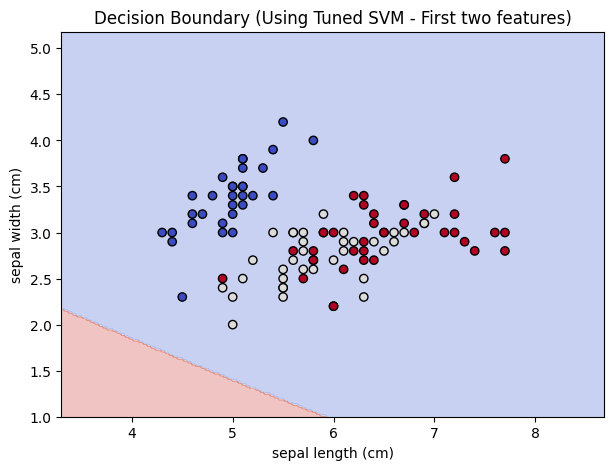

In [13]:
# Step 9: Visualizing Decision Boundary (for first two features only)
import numpy as np

# Use the full training set for visualization
X_set, y_set = X_train, y_train
best_model = best_svm # Use the best model found by GridSearchCV

# Create a meshgrid of all four features
# This is a simplification for visualization on a 2D plot, ideally you'd use a PairGrid or similar for multi-dimensional data
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
z_min, z_max = X_set[:, 2].min() - 1, X_set[:, 2].max() + 1
w_min, w_max = X_set[:, 3].min() - 1, X_set[:, 3].max() + 1

# Create a meshgrid for the first two features for plotting purposes
X1, X2 = np.meshgrid(
    np.arange(x_min, x_max, 0.02), # Reduced step size for smoother boundary
    np.arange(y_min, y_max, 0.02)
)

# To plot the decision boundary in 2D, we need to fix the other two features.
# A common approach is to use the mean of the training data for the fixed features.
fixed_z = np.mean(X_set[:, 2])
fixed_w = np.mean(X_set[:, 3])

# Create a dataset for prediction using the meshgrid and fixed features
X_predict = np.c_[X1.ravel(), X2.ravel(), np.full(X1.ravel().shape, fixed_z), np.full(X1.ravel().shape, fixed_w)]


plt.figure(figsize=(7,5))
# Predict the class for each point in the meshgrid
Z = best_model.predict(X_predict).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.3, cmap='coolwarm')

# Plot the training points
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary (Using Tuned SVM - First two features)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

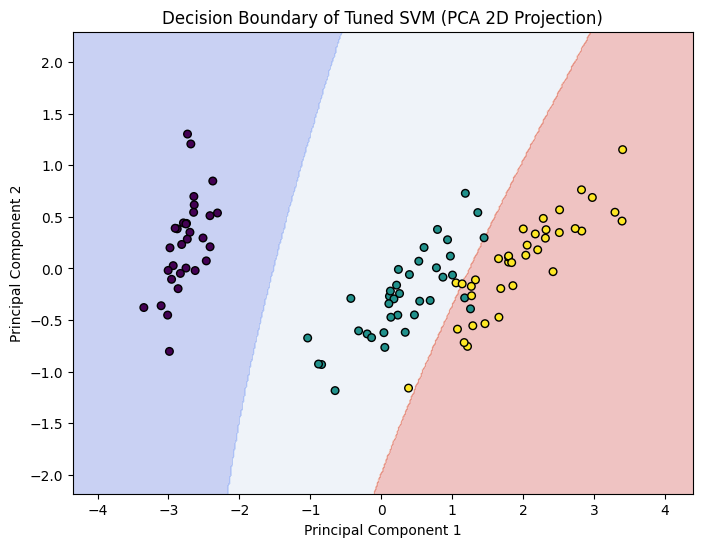

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

best_model = grid.best_estimator_

# Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for mesh grid
Z = best_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, s=30, edgecolor='k')
plt.title('Decision Boundary of Tuned SVM (PCA 2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


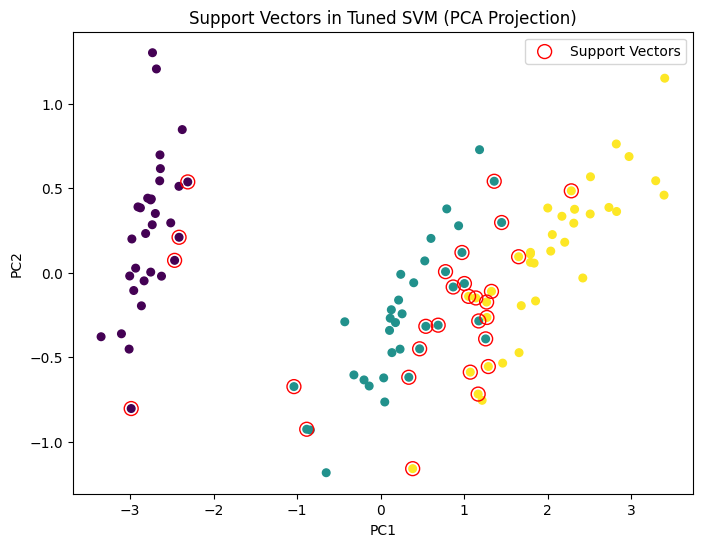

In [17]:
# For 2D projection (PCA)
support_vectors = pca.transform(best_model.support_vectors_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='r', label='Support Vectors')
plt.title('Support Vectors in Tuned SVM (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


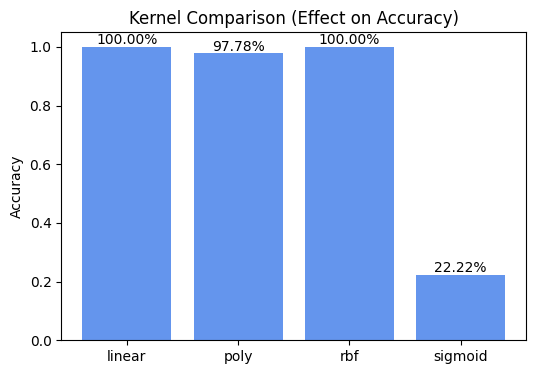

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

plt.figure(figsize=(6,4))
plt.bar(kernels, scores, color='cornflowerblue')
plt.title('Kernel Comparison (Effect on Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05) # Increased the upper limit of the y-axis
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center')
plt.show()

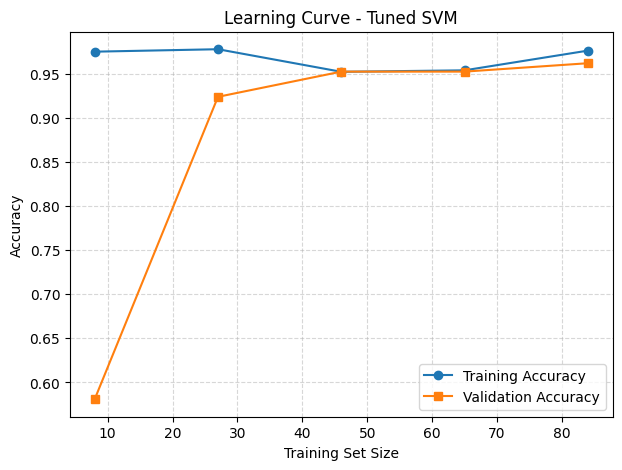

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.title('Learning Curve - Tuned SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
